In [94]:
import numpy as np
import pandas as pd

import warnings 

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
#import scikitplot as skplt

from sklearn import preprocessing
labelenc = preprocessing.LabelEncoder()



In [95]:

#import dataset and separate columns at ;
df1 = pd.read_csv('Hotel-A-train.csv')
validate = pd.read_csv('Hotel-A-validation.csv')
test = pd.read_csv('Hotel-A-test.csv')

In [96]:
df1.head(5)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,...,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,...,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242


In [97]:
#check for null values
df1.isnull().sum() 

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

In [98]:
df1.Booking_date              

0        5/21/2015
1        5/26/2015
2        6/29/2015
3        6/20/2015
4        6/20/2015
           ...    
27494    7/25/2016
27495    4/26/2016
27496    8/23/2016
27497    5/25/2016
27498    6/27/2016
Name: Booking_date, Length: 27499, dtype: object

In [99]:

df1['Reservation_Status'].value_counts(normalize=True)*100

Check-In    77.239172
Canceled    15.033274
No-Show      7.727554
Name: Reservation_Status, dtype: float64

In [100]:
corr= df1.corr(method='pearson')['Gender'][:]
corr

KeyError: 'Gender'

### Cleaning

In [101]:
#change date to string and then to ordinal

#training data

df1['Booking_date']= pd.to_datetime(df1['Booking_date']).apply(lambda x: x.toordinal())
df1['Expected_checkin']= pd.to_datetime(df1['Expected_checkin']).apply(lambda x: x.toordinal())
df1['Expected_checkout']= pd.to_datetime(df1['Expected_checkout']).apply(lambda x: x.toordinal())


In [102]:
#validate

validate['Booking_date']= pd.to_datetime(validate['Booking_date']).apply(lambda x: x.toordinal())
validate['Expected_checkin']= pd.to_datetime(validate['Expected_checkin']).apply(lambda x: x.toordinal())
validate['Expected_checkout']= pd.to_datetime(validate['Expected_checkout']).apply(lambda x: x.toordinal())

In [103]:
#testing data

test['Booking_date']= pd.to_datetime(test['Booking_date']).apply(lambda x: x.toordinal())
test['Expected_checkin']= pd.to_datetime(test['Expected_checkin']).apply(lambda x: x.toordinal())
test['Expected_checkout']= pd.to_datetime(test['Expected_checkout']).apply(lambda x: x.toordinal())


In [104]:
#give values for categorical data
#validate and  train datasets



for x in [df1,validate]:
    x['Gender'] = labelenc.fit_transform(x.Gender)
    x['Ethnicity'] = labelenc.fit_transform(x.Ethnicity)
    x['Educational_Level'] = labelenc.fit_transform(x.Educational_Level)
    x['Country_region'] = labelenc.fit_transform(x.Country_region)
    x['Income'] = labelenc.fit_transform(x.Income)
    x['Meal_Type'] = labelenc.fit_transform(x.Meal_Type)
    x['Visted_Previously'] = labelenc.fit_transform(x.Visted_Previously)
    x['Previous_Cancellations'] = labelenc.fit_transform(x.Previous_Cancellations)
    x['Deposit_type'] = labelenc.fit_transform(x.Deposit_type)
    x['Booking_channel'] = labelenc.fit_transform(x.Booking_channel)
    x['Required_Car_Parking'] = labelenc.fit_transform(x.Required_Car_Parking)
    x['Reservation_Status'] = labelenc.fit_transform(x.Reservation_Status)
    x['Use_Promotion'] = labelenc.fit_transform(x.Use_Promotion)
    x['Hotel_Type'] = labelenc.fit_transform(x.Hotel_Type)
    
    

In [105]:
df1.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,0,40,2,1,2,1,1,735780,735781,...,0,0,0,0,2,1,1,1,10,218
1,77491756,0,49,2,3,1,0,1,735780,735781,...,0,0,0,2,2,1,1,0,0,185
2,73747291,0,42,3,1,2,0,1,735781,735785,...,0,0,0,0,2,1,1,0,0,119
3,67301739,1,25,0,0,3,2,0,735781,735782,...,0,0,0,2,0,1,1,1,5,144
4,77222321,0,62,2,2,0,0,2,735782,735783,...,0,0,0,0,1,0,1,1,10,242


In [106]:
validate.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,45716350,1,56,3,1,2,3,2,736207,736209,...,2,0,0,0,0,0,2,1,15,192
1,88857401,1,60,2,0,0,3,2,736207,736211,...,1,1,0,0,2,1,0,0,0,187
2,16074440,0,58,1,0,2,1,0,736208,736209,...,1,0,0,0,1,0,0,1,10,227
3,10992124,0,23,2,0,0,0,0,736207,736209,...,1,1,0,2,1,0,1,1,25,189
4,15934351,0,47,1,0,0,2,1,736207,736208,...,2,1,0,0,2,1,1,1,10,218


In [107]:
#test dataset

for x in [test]:
    x['Gender'] = labelenc.fit_transform(x.Gender)
    x['Ethnicity'] = labelenc.fit_transform(x.Ethnicity)
    x['Educational_Level'] = labelenc.fit_transform(x.Educational_Level)
    x['Country_region'] = labelenc.fit_transform(x.Country_region)
    x['Income'] = labelenc.fit_transform(x.Income)
    x['Meal_Type'] = labelenc.fit_transform(x.Meal_Type)
    x['Visted_Previously'] = labelenc.fit_transform(x.Visted_Previously)
    x['Previous_Cancellations'] = labelenc.fit_transform(x.Previous_Cancellations)
    x['Deposit_type'] = labelenc.fit_transform(x.Deposit_type)
    x['Booking_channel'] = labelenc.fit_transform(x.Booking_channel)
    x['Required_Car_Parking'] = labelenc.fit_transform(x.Required_Car_Parking)
    x['Use_Promotion'] = labelenc.fit_transform(x.Use_Promotion)
    x['Hotel_Type'] = labelenc.fit_transform(x.Hotel_Type)
    
    

In [108]:
test.head()

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate
0,62931593,0,52,2,1,0,2,1,736286,736287,...,0,2,0,0,0,1,1,1,10,153
1,70586099,0,47,2,1,0,0,0,736286,736287,...,0,1,0,0,0,2,0,0,0,210
2,4230648,0,28,1,1,2,0,1,736447,736450,...,0,0,0,0,0,0,0,1,5,117
3,25192322,0,65,3,2,0,2,0,736286,736288,...,2,1,0,0,0,2,1,1,10,107
4,80931528,1,45,0,0,0,2,1,736286,736288,...,0,0,0,0,2,0,0,0,0,119


In [93]:
#drop reservation id as it has no prediction power

df1.drop(['Reservation-id'], axis='columns', inplace=True)
validate.drop(['Reservation-id'], axis='columns', inplace=True)

In [109]:
# training and validating 



X_train, X_val = df1.iloc[:, df1.columns != 'Reservation_Status'], df1.iloc[:, -4]
Y_train, Y_val = validate.iloc[:, validate.columns != 'Reservation_Status'], validate.iloc[:, -4]

In [110]:
X_train

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,0,40,2,1,2,1,1,735780,735781,...,0,0,0,0,0,2,1,1,10,218
1,77491756,0,49,2,3,1,0,1,735780,735781,...,0,0,0,0,2,2,1,0,0,185
2,73747291,0,42,3,1,2,0,1,735781,735785,...,0,0,0,0,0,2,1,0,0,119
3,67301739,1,25,0,0,3,2,0,735781,735782,...,0,0,0,0,2,0,1,1,5,144
4,77222321,0,62,2,2,0,0,2,735782,735783,...,0,0,0,0,0,1,0,1,10,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,0,49,0,3,2,3,1,736207,736208,...,1,2,1,1,0,2,1,1,10,100
27495,56414525,0,49,1,0,0,2,0,736207,736208,...,0,0,0,0,2,0,1,1,40,194
27496,52023375,0,49,2,2,1,2,0,736208,736209,...,1,2,0,0,0,1,1,1,5,202
27497,98041387,1,65,0,0,0,2,0,736207,736208,...,0,1,0,0,0,2,0,1,20,157


In [111]:
X_val.head()

0    1
1    1
2    1
3    1
4    1
Name: Reservation_Status, dtype: int32

In [21]:
Y_val.head()

0    2
1    0
2    0
3    1
4    1
Name: Reservation_Status, dtype: int32

In [22]:
corr= df1.corr(method='pearson')['Reservation_Status'][:]
corr

Gender                    0.007850
Age                      -0.005264
Ethnicity                -0.015537
Educational_Level         0.010437
Income                   -0.005225
Country_region           -0.002936
Hotel_Type               -0.012368
Expected_checkin          0.014215
Expected_checkout         0.014204
Booking_date              0.012859
Adults                    0.011614
Children                 -0.003690
Babies                    0.015236
Meal_Type                -0.025708
Visted_Previously         0.000465
Previous_Cancellations    0.006795
Deposit_type             -0.007627
Booking_channel           0.002092
Required_Car_Parking      0.000519
Reservation_Status        1.000000
Use_Promotion             0.001088
Discount_Rate            -0.002768
Room_Rate                 0.003873
Name: Reservation_Status, dtype: float64

In [23]:
from sklearn.tree import DecisionTreeClassifier

DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train, Y_train)

ValueError: Number of labels=2749 does not match number of samples=27499

In [24]:
X_train.shape

(27499, 22)

In [25]:
Y_train.shape

(2749, 22)

In [112]:
X=  df1.drop(['Reservation_Status'], axis=1)
Y = df1['Reservation_Status']

In [113]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [114]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [115]:

X_test = test

In [116]:

X_train, X_val, y_train, y_val = train_test_split(X, Y)

In [117]:
X_val

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate
16788,54700159,1,33,2,0,2,0,1,735853,735854,...,1,0,0,0,2,1,1,1,20,198
1492,93836798,1,19,2,1,3,3,1,735757,735759,...,1,0,0,0,0,1,0,1,25,230
26490,34827528,1,55,2,0,0,2,0,736177,736178,...,0,1,0,0,0,0,1,1,10,116
26630,36103159,0,67,2,1,2,3,1,736182,736186,...,1,1,1,1,0,2,1,1,10,148
20088,5160478,0,29,3,2,3,2,1,736005,736006,...,1,1,1,1,0,2,1,0,0,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21266,42966192,0,58,1,0,0,0,1,736021,736022,...,0,2,0,0,0,2,0,0,0,118
18333,79571043,1,24,2,0,0,0,0,736003,736005,...,0,1,0,0,0,2,0,1,15,220
21814,6134334,0,58,0,0,0,1,0,736035,736039,...,1,1,0,0,0,2,0,1,20,114
2321,83265150,1,63,2,1,1,2,1,735824,735825,...,0,1,1,1,0,1,1,1,5,132


In [118]:
# Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
RFclassifier=RandomForestClassifier(n_jobs=-1)
RFclassifier.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [124]:
y_pred=RFclassifier.predict(X_val)

In [125]:
y_pred.shape

(6875,)

In [126]:
y_pred_test = RFclassifier.predict(X_test)

In [130]:
df1.rename(columns={'Reservation-id': 'Reservation_id'}, inplace=True)
test.rename(columns={'Reservation-id': 'Reservation_id'}, inplace=True)

In [133]:
output = pd.DataFrame({'Reservation-id':test.Reservation_id.astype(np.int32), 'Reservation_Status':y_pred_test})
output.to_csv('my_submission1.csv', index=False)

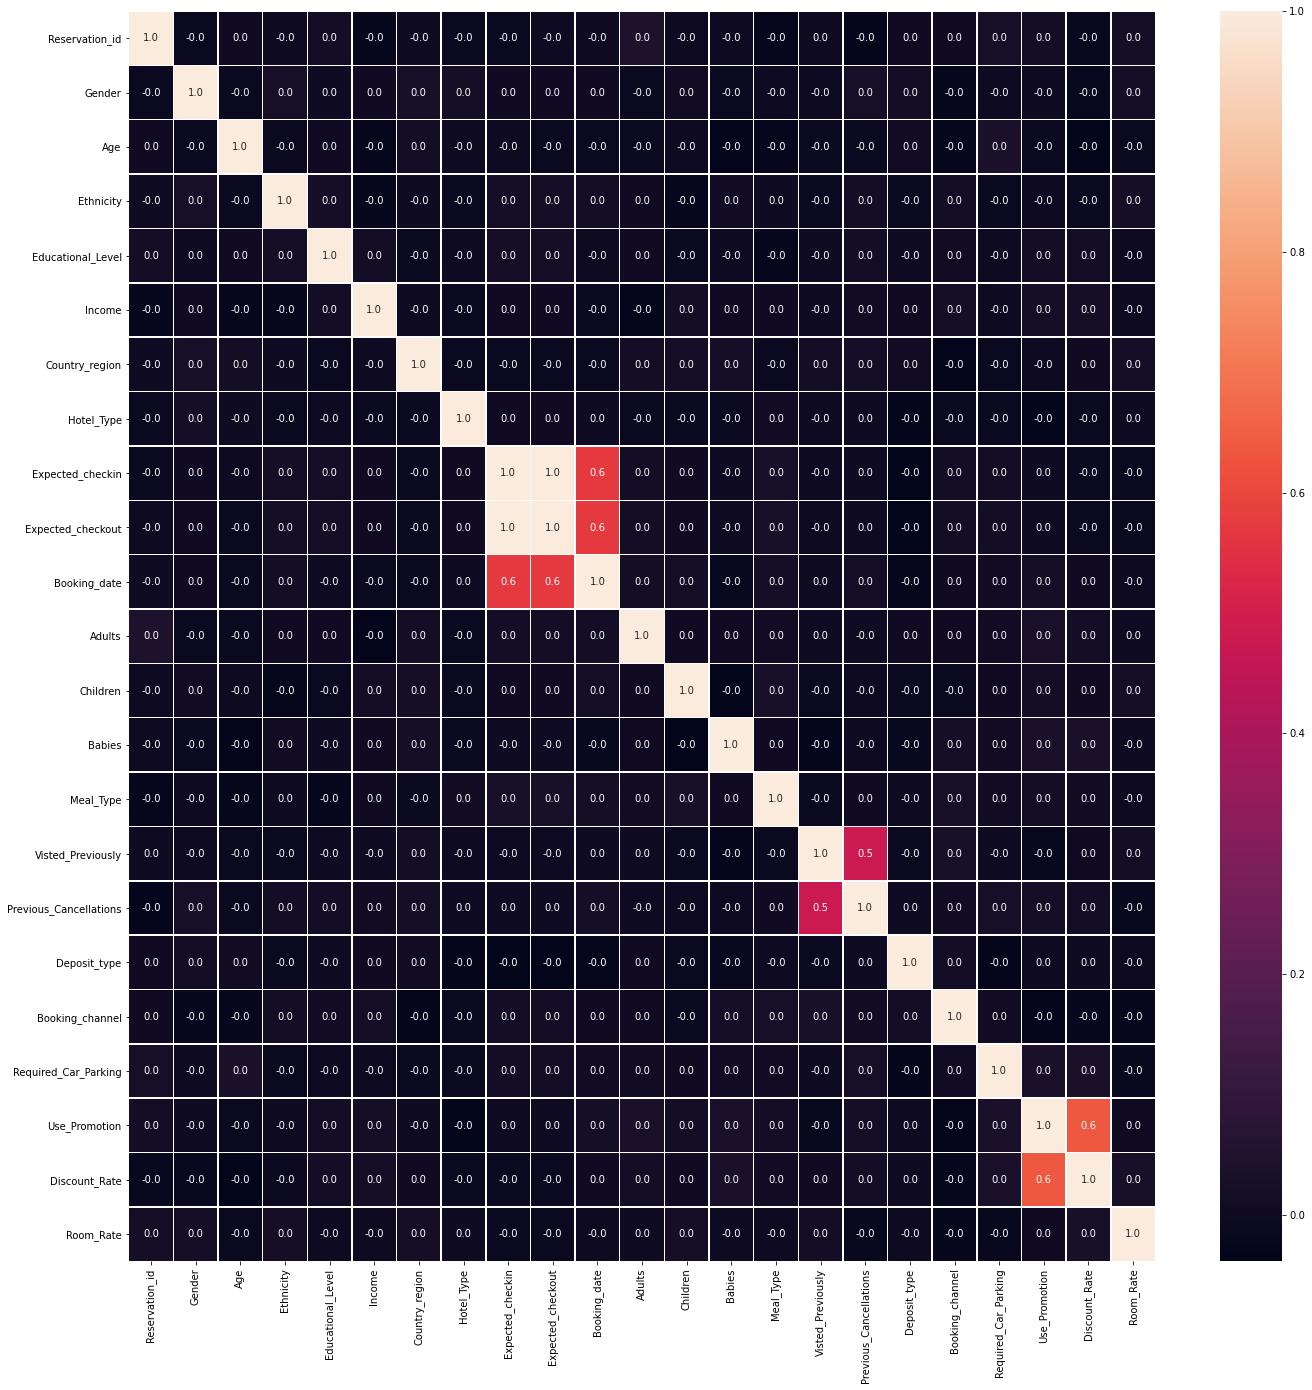

In [135]:
#correlation map
f,ax = plt.subplots(figsize=(23, 23))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [119]:
# Prediction
y_pred=RFclassifier.predict(X_test)

In [120]:
X_test

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate
0,62931593,0,52,2,1,0,2,1,736286,736287,...,0,2,0,0,0,1,1,1,10,153
1,70586099,0,47,2,1,0,0,0,736286,736287,...,0,1,0,0,0,2,0,0,0,210
2,4230648,0,28,1,1,2,0,1,736447,736450,...,0,0,0,0,0,0,0,1,5,117
3,25192322,0,65,3,2,0,2,0,736286,736288,...,2,1,0,0,0,2,1,1,10,107
4,80931528,1,45,0,0,0,2,1,736286,736288,...,0,0,0,0,2,0,0,0,0,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,39110574,1,53,2,0,1,2,2,736417,736418,...,1,1,1,0,1,2,1,0,0,153
4314,5496554,0,63,3,0,1,2,2,736417,736420,...,0,2,0,0,2,0,1,1,40,233
4315,59004046,0,59,3,1,2,0,0,736417,736418,...,0,1,0,0,0,1,1,0,0,242
4316,65838682,1,43,0,0,0,3,2,736417,736418,...,1,0,0,0,0,2,1,0,0,208


In [121]:
y_pred.shape

(4318,)

In [123]:
y_val

16788    0
1492     1
26490    0
26630    1
20088    0
        ..
21266    1
18333    1
21814    0
2321     1
4412     1
Name: Reservation_Status, Length: 6875, dtype: int32

In [122]:
# Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_val,y_pred)
score

ValueError: Found input variables with inconsistent numbers of samples: [6875, 4318]

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val, y_pred))

[[   3 1052    0]
 [   7 5329    0]
 [   0  484    0]]


In [71]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.00      0.01      1055
           1       0.78      1.00      0.87      5336
           2       0.00      0.00      0.00       484

    accuracy                           0.78      6875
   macro avg       0.36      0.33      0.29      6875
weighted avg       0.65      0.78      0.68      6875



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
y_pred.shape

(6875,)

In [56]:
output = pd.DataFrame({'Reservation ID':test.Gender.astype(np.int32), 'Survived':y_pred})
output.to_csv('my_submission.csv', index=False)

ValueError: array length 6875 does not match index length 4318

In [100]:
#Implement Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier

DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [101]:
DTy_pred=DTclassifier.predict(X_test)

In [102]:
#checking accuracy
DTscore=accuracy_score(y_test,DTy_pred)
DTscore

0.6224242424242424

In [103]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_train,y_train)

KNeighborsClassifier()

In [104]:
KNNy_pred=KNNclassifier.predict(X_test)

In [105]:
#checking accuracy
KNNscore=accuracy_score(y_test,KNNy_pred)
KNNscore

0.7332121212121212

In [35]:
output = pd.DataFrame({'Reservation ID':test.Gender.astype(np.int32), 'Survived':y_pred})
output.to_csv('my_submission.csv', index=False)

ValueError: array length 8250 does not match index length 4318

In [39]:
y_train

27065    1
27376    1
3665     1
26843    2
2267     1
        ..
11925    1
6723     1
26159    1
20955    1
10928    1
Name: Reservation_Status, Length: 19249, dtype: int32

In [42]:
X2_test = test.iloc[:]

In [43]:
# Prediction
y2_pred=RFclassifier.predict(X2_test)

ValueError: Number of features of the model must match the input. Model n_features is 22 and input n_features is 23 